In [61]:
import sys
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')
from functions import *

In [65]:
data = (pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/WMEM_Behavior_ThoughtControl_ThoughtSampling_n70_20210227.csv')
        .rename({'Subject':'SubID'}, axis=1))

In [66]:
data.iloc[:, 4:].columns

Index(['100_neg_intr_RT', '100_neg_nov_RT', '100_pos_RT', '2000_neg_intr_RT',
       '2000_neg_nov_RT', '2000_pos_RT', 'log_100_neg_intr_RT',
       'log_100_neg_nov_RT', 'log_100_pos_RT', 'log_2000_neg_intr_RT',
       'log_2000_neg_nov_RT', 'log_2000_pos_RT', '100_intr_costs',
       '2000_intr_costs', 'inc25_cong_RT', 'inc25_inc_RT', 'inc75_cong_RT',
       'inc75_inc_RT', 'inc25_cong_ACC', 'inc25_inc_ACC', 'inc75_cong_ACC',
       'inc75_inc_ACC', 'inc25_stroop_eff', 'inc75_stroop_eff',
       'WBSI_suppress', 'WBSI_intrusion', 'PSWQ_total', 'BDI_total', 'STAI_S',
       'RRS_Dep', 'RRS_Brood', 'RRS_Refl', 'Control_mean', 'Frequency_mean',
       'Goal_mean', 'Imagery_mean', 'Intensity_mean', 'Interference_mean',
       'Negative_mean', 'Positive_mean', 'SelfIdentity_mean',
       'Significance_mean', 'Social_mean', 'Specificity_mean',
       'Spontaneous_mean'],
      dtype='object')

In [67]:
stroop_cols = ['inc25_cong_RT', 'inc25_inc_RT', 'inc75_cong_RT', 'inc75_inc_RT', 'inc25_cong_ACC', 
               'inc25_inc_ACC', 'inc75_cong_ACC', 'inc75_inc_ACC', 'inc25_stroop_eff', 'inc75_stroop_eff']

sternberg_cols = ['100_neg_intr_RT', '100_neg_nov_RT', '100_pos_RT', '2000_neg_intr_RT', '2000_neg_nov_RT', '2000_pos_RT', 
                  'log_100_neg_intr_RT', 'log_100_neg_nov_RT', 'log_100_pos_RT', 'log_2000_neg_intr_RT', 'log_2000_neg_nov_RT', 
                  'log_2000_pos_RT', '100_intr_costs', '2000_intr_costs']

# Append "_stern" to each element in the sternberg_cols list
sternberg_cols_updated = [col + "_stern" for col in sternberg_cols]

# Append "stroop_" to each element in the stroop_cols list
stroop_cols_updated = [col + "_stroop" for col in stroop_cols]

# Create a dictionary to map old column names to new ones
rename_dict = {**dict(zip(sternberg_cols, sternberg_cols_updated)), 
               **dict(zip(stroop_cols, stroop_cols_updated))}

# Rename the columns in the DataFrame
data.rename(columns=rename_dict, inplace=True)

# Verify the column names have been updated
print(data.columns)

Index(['SubID', 'Age_At_Consent', 'Sex', 'Notes', '100_neg_intr_RT_stern',
       '100_neg_nov_RT_stern', '100_pos_RT_stern', '2000_neg_intr_RT_stern',
       '2000_neg_nov_RT_stern', '2000_pos_RT_stern',
       'log_100_neg_intr_RT_stern', 'log_100_neg_nov_RT_stern',
       'log_100_pos_RT_stern', 'log_2000_neg_intr_RT_stern',
       'log_2000_neg_nov_RT_stern', 'log_2000_pos_RT_stern',
       '100_intr_costs_stern', '2000_intr_costs_stern', 'inc25_cong_RT_stroop',
       'inc25_inc_RT_stroop', 'inc75_cong_RT_stroop', 'inc75_inc_RT_stroop',
       'inc25_cong_ACC_stroop', 'inc25_inc_ACC_stroop',
       'inc75_cong_ACC_stroop', 'inc75_inc_ACC_stroop',
       'inc25_stroop_eff_stroop', 'inc75_stroop_eff_stroop', 'WBSI_suppress',
       'WBSI_intrusion', 'PSWQ_total', 'BDI_total', 'STAI_S', 'RRS_Dep',
       'RRS_Brood', 'RRS_Refl', 'Control_mean', 'Frequency_mean', 'Goal_mean',
       'Imagery_mean', 'Intensity_mean', 'Interference_mean', 'Negative_mean',
       'Positive_mean', 'SelfId

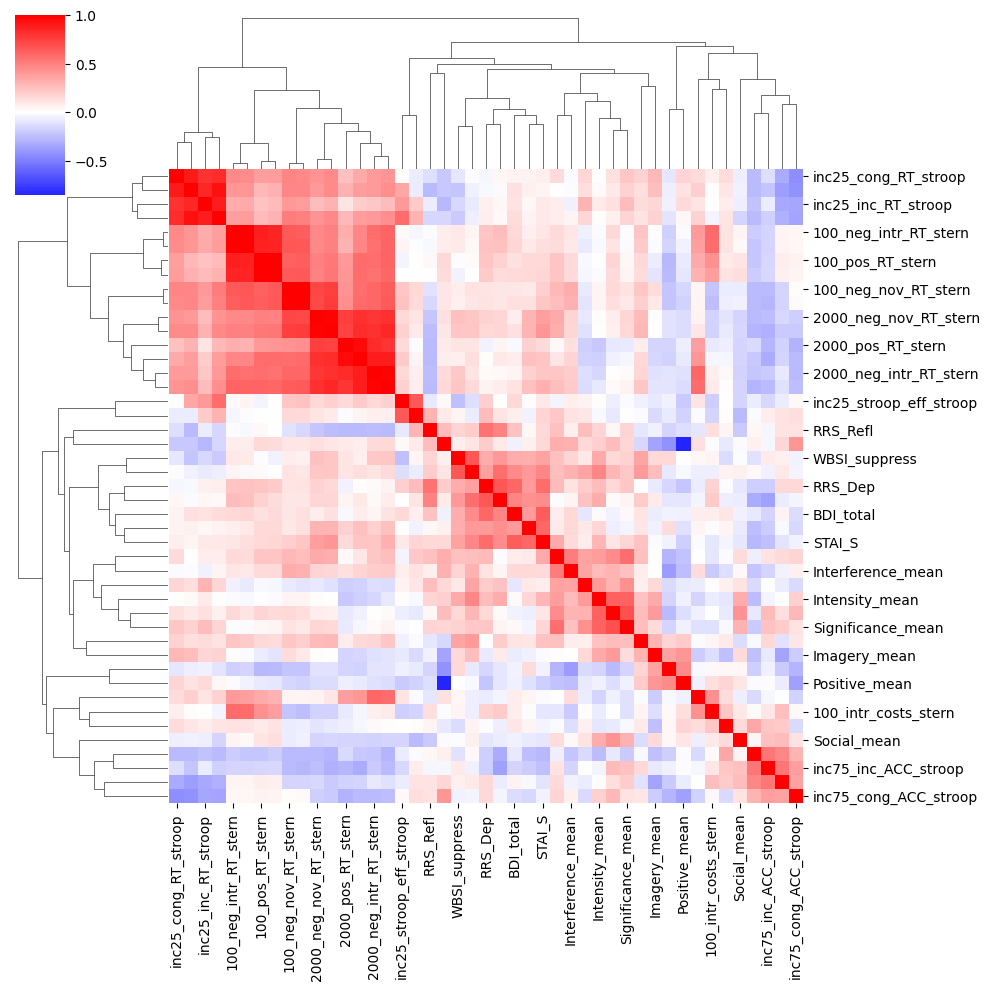

In [68]:
cors = data.iloc[:, 4:].corr()

sns.clustermap(cors, center=0, cmap='bwr')

<AxesSubplot:>

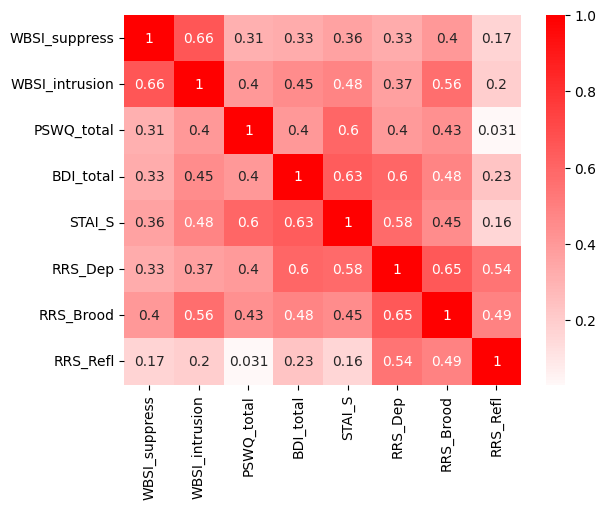

In [69]:
sns.heatmap(data[['WBSI_suppress','WBSI_intrusion','PSWQ_total','BDI_total','STAI_S','RRS_Dep','RRS_Brood','RRS_Refl']].corr(), 
            center=0, cmap='bwr', annot=True)

In [70]:
[sternberg_cols_updated + stroop_cols_updated][0]

['100_neg_intr_RT_stern',
 '100_neg_nov_RT_stern',
 '100_pos_RT_stern',
 '2000_neg_intr_RT_stern',
 '2000_neg_nov_RT_stern',
 '2000_pos_RT_stern',
 'log_100_neg_intr_RT_stern',
 'log_100_neg_nov_RT_stern',
 'log_100_pos_RT_stern',
 'log_2000_neg_intr_RT_stern',
 'log_2000_neg_nov_RT_stern',
 'log_2000_pos_RT_stern',
 '100_intr_costs_stern',
 '2000_intr_costs_stern',
 'inc25_cong_RT_stroop',
 'inc25_inc_RT_stroop',
 'inc75_cong_RT_stroop',
 'inc75_inc_RT_stroop',
 'inc25_cong_ACC_stroop',
 'inc25_inc_ACC_stroop',
 'inc75_cong_ACC_stroop',
 'inc75_inc_ACC_stroop',
 'inc25_stroop_eff_stroop',
 'inc75_stroop_eff_stroop']

In [71]:
cors = data[sternberg_cols_updated + stroop_cols_updated].corr()

<Figure size 1000x1000 with 0 Axes>

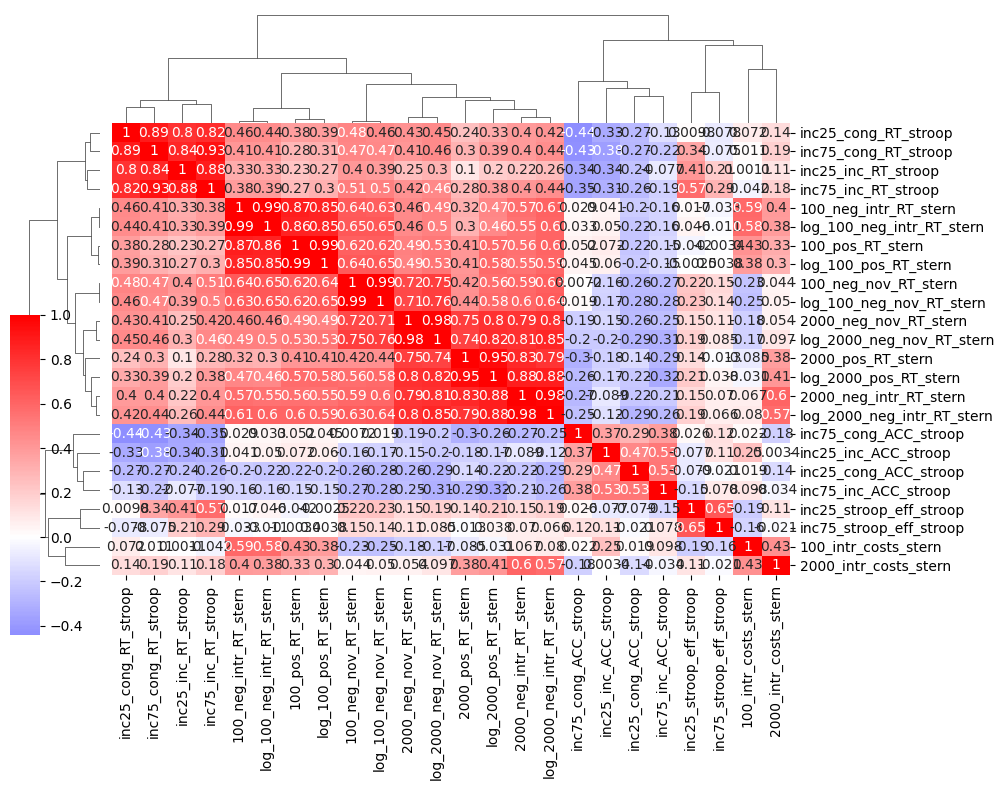

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cors' is your correlation matrix or data frame you want to plot
# Adjust the figsize as needed to make the figure larger
plt.figure(figsize=(10, 10))  # This line might not affect sns.clustermap directly

# Now pass figsize through the rc argument for finer control
sns.clustermap(cors, cmap='bwr', annot=True, center=0, figsize=(10, 8), 
               dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4))

In [73]:
stroop_stern = data[sternberg_cols_updated + stroop_cols_updated]

# Assuming stroop_stern is your DataFrame
# Filter columns: keep only those not containing "log"
cols_to_keep = [col for col in stroop_stern.columns if "RT" not in col and "log" not in col]
# Drop columns containing "log" by selecting the columns to keep
stroop_stern = stroop_stern[cols_to_keep]

stroop_stern.fillna(stroop_stern.mean(), inplace=True)

In [74]:
stroop_stern.columns

Index(['100_intr_costs_stern', '2000_intr_costs_stern',
       'inc25_cong_ACC_stroop', 'inc25_inc_ACC_stroop',
       'inc75_cong_ACC_stroop', 'inc75_inc_ACC_stroop',
       'inc25_stroop_eff_stroop', 'inc75_stroop_eff_stroop'],
      dtype='object')

In [75]:
acc_data = stroop_stern.filter(like='ACC')
eff_data = stroop_stern.filter(like='eff')
eff_data = stroop_stern.filter(like='costs')

<Figure size 1000x1000 with 0 Axes>

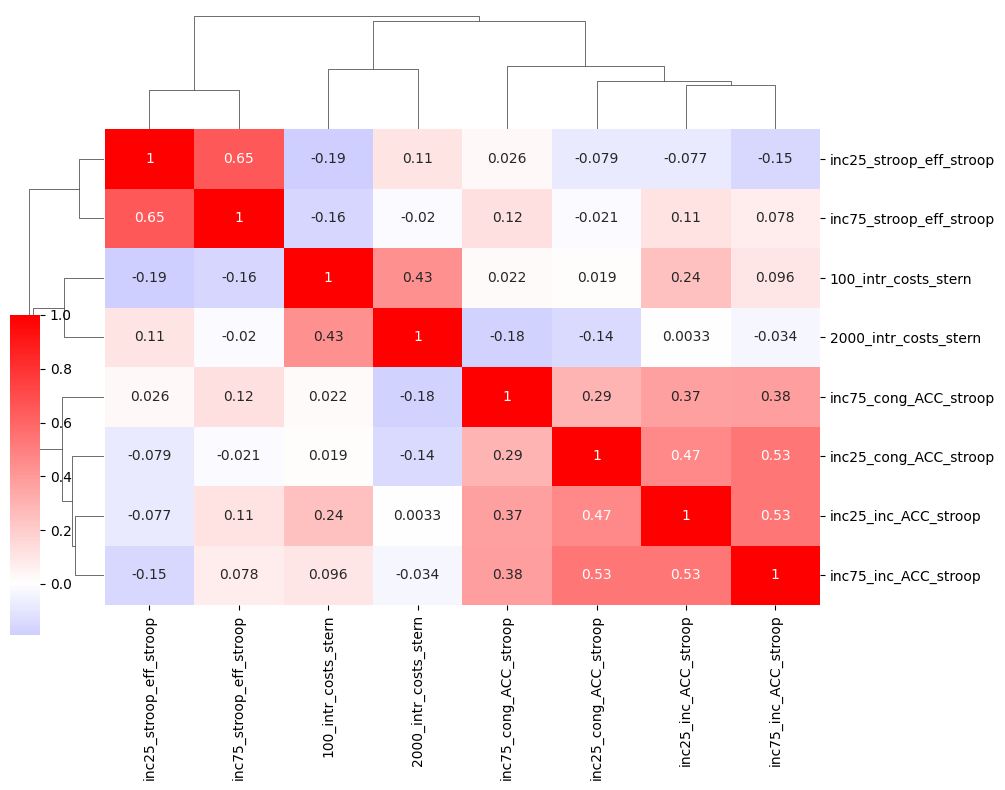

In [76]:
cors = stroop_stern.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cors' is your correlation matrix or data frame you want to plot
# Adjust the figsize as needed to make the figure larger
plt.figure(figsize=(10, 10))  # This line might not affect sns.clustermap directly

# Now pass figsize through the rc argument for finer control
sns.clustermap(cors, cmap='bwr', annot=True, center=0, figsize=(10, 8), 
               dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .4))

In [84]:
data = data[['SubID', '100_intr_costs_stern', '2000_intr_costs_stern','inc25_cong_ACC_stroop', 'inc25_inc_ACC_stroop', 
      'inc75_cong_ACC_stroop', 'inc75_inc_ACC_stroop','inc25_stroop_eff_stroop', 'inc75_stroop_eff_stroop']]

data.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/WM_stroop_stern.csv', index=False)